In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [13]:
model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callback = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[callback],
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

Epoch 1/20
375/375 - 5s - 13ms/step - accuracy: 0.8886 - loss: 0.3653 - val_accuracy: 0.9563 - val_loss: 0.1521
Epoch 2/20
375/375 - 4s - 10ms/step - accuracy: 0.9468 - loss: 0.1726 - val_accuracy: 0.9650 - val_loss: 0.1166
Epoch 3/20
375/375 - 4s - 11ms/step - accuracy: 0.9596 - loss: 0.1322 - val_accuracy: 0.9704 - val_loss: 0.0937
Epoch 4/20
375/375 - 5s - 14ms/step - accuracy: 0.9661 - loss: 0.1102 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 5/20
375/375 - 4s - 10ms/step - accuracy: 0.9695 - loss: 0.0965 - val_accuracy: 0.9750 - val_loss: 0.0815
Epoch 6/20
375/375 - 3s - 7ms/step - accuracy: 0.9734 - loss: 0.0826 - val_accuracy: 0.9737 - val_loss: 0.0844
Epoch 7/20
375/375 - 3s - 7ms/step - accuracy: 0.9754 - loss: 0.0761 - val_accuracy: 0.9771 - val_loss: 0.0807
Epoch 8/20
375/375 - 3s - 7ms/step - accuracy: 0.9769 - loss: 0.0721 - val_accuracy: 0.9736 - val_loss: 0.0920
Epoch 9/20
375/375 - 4s - 10ms/step - accuracy: 0.9799 - loss: 0.0620 - val_accuracy: 0.9779 - val_loss: 0.

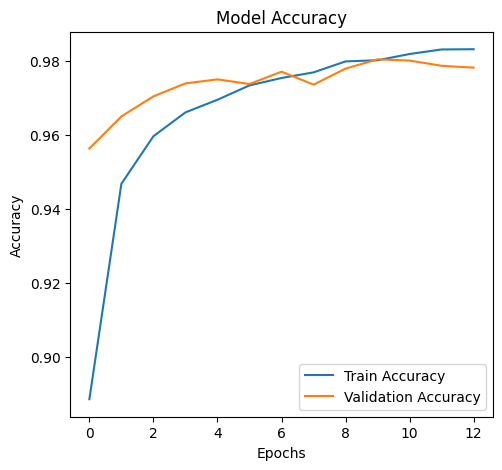

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

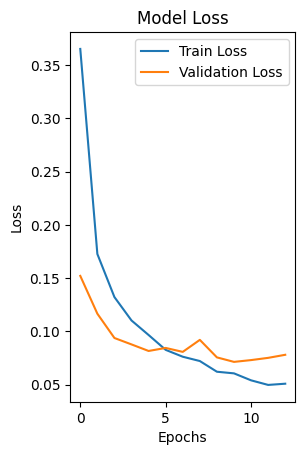

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()

In [17]:
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



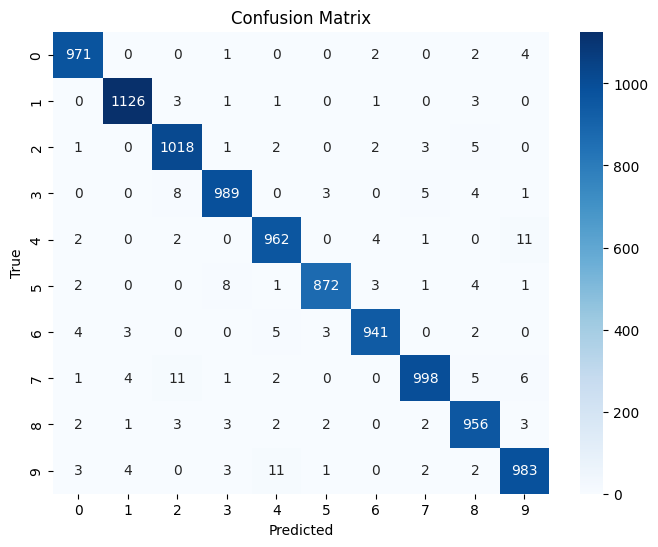

In [18]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()